In [35]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pickle.load( open( "2015-12-12-mlpexperiments_results5.p", "rb" ) )
df.shape

(50, 20)

In [37]:
df[df['training_size'] == 500000]

,cm_overall,epochs,network,pct_white,test_size,training_size,p_cm,P_cm,r_cm,R_cm,n_cm,N_cm,b_cm,B_cm,q_cm,Q_cm,k_cm,K_cm,white_cm,black_cm
1,"[[3807, 559], [1165, 4469]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,500000,"[[504, 99], [70, 500]]","[[462, 174], [32, 591]]","[[314, 113], [77, 368]]","[[342, 136], [58, 466]]","[[268, 37], [49, 267]]","[[293, 110], [13, 381]]","[[259, 47], [85, 217]]","[[276, 111], [25, 367]]","[[301, 67], [62, 287]]","[[295, 121], [27, 443]]","[[229, 59], [39, 245]]","[[264, 91], [22, 337]]","[[1932, 743], [177, 2585]]","[[1875, 422], [382, 1884]]"
1,"[[3601, 369], [1371, 4659]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,500000,"[[464, 139], [20, 550]]","[[480, 156], [37, 586]]","[[259, 168], [38, 407]]","[[336, 142], [58, 466]]","[[231, 74], [36, 280]]","[[295, 108], [12, 382]]","[[222, 84], [34, 268]]","[[291, 96], [37, 355]]","[[273, 95], [22, 327]]","[[302, 114], [37, 433]]","[[202, 86], [16, 268]]","[[246, 109], [22, 337]]","[[1950, 725], [203, 2559]]","[[1651, 646], [166, 2100]]"
1,"[[3854, 567], [1118, 4461]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,500000,"[[519, 84], [57, 513]]","[[486, 150], [35, 588]]","[[304, 123], [61, 384]]","[[359, 119], [76, 448]]","[[275, 30], [52, 264]]","[[297, 106], [19, 375]]","[[256, 50], [62, 240]]","[[290, 97], [46, 346]]","[[291, 77], [45, 304]]","[[301, 115], [43, 427]]","[[223, 65], [32, 252]]","[[253, 102], [39, 320]]","[[1986, 689], [258, 2504]]","[[1868, 429], [309, 1957]]"
1,"[[3945, 492], [1027, 4536]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,500000,"[[509, 94], [38, 532]]","[[512, 124], [53, 570]]","[[307, 120], [54, 391]]","[[373, 105], [70, 454]]","[[256, 49], [37, 279]]","[[329, 74], [14, 380]]","[[246, 60], [44, 258]]","[[308, 79], [42, 350]]","[[291, 77], [39, 310]]","[[329, 87], [42, 428]]","[[219, 69], [30, 254]]","[[266, 89], [29, 330]]","[[2117, 558], [250, 2512]]","[[1828, 469], [242, 2024]]"
1,"[[3811, 762], [1161, 4266]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,500000,"[[532, 71], [90, 480]]","[[479, 157], [33, 590]]","[[311, 116], [106, 339]]","[[340, 138], [47, 477]]","[[269, 36], [113, 203]]","[[282, 121], [21, 373]]","[[259, 47], [111, 191]]","[[279, 108], [37, 355]]","[[304, 64], [97, 252]]","[[290, 126], [33, 437]]","[[219, 69], [49, 235]]","[[247, 108], [25, 334]]","[[1917, 758], [196, 2566]]","[[1894, 403], [566, 1700]]"


In [38]:
#methods to decode serialized network json
import json

def get_num_layers(json_str):
    # number of actual layers - 5 for input and output / 3 for each hidden + 2 for input and output
    return (len(json.loads(json_str)['layers']) - 5) / 3 + 2

def get_first_activation(json_str):
    return json.loads(json_str)['layers'][1]['activation']

def get_first_width(json_str):
    return json.loads(json_str)['layers'][0]['output_dim']

In [39]:
#convert confusion matrices to accuracy
def cm2accuracy(cm):
    return (cm[0][0] + cm[1][1] * 1.0) / sum([sum(a) for a in cm])
    
df['overall_acc'] = df['cm_overall'].apply(cm2accuracy)
df['width'] = df['network'].apply(get_first_width)
df['num_layers'] = df['network'].apply(get_num_layers)

In [40]:
df.head()

,cm_overall,epochs,network,pct_white,test_size,training_size,p_cm,P_cm,r_cm,R_cm,...,B_cm,q_cm,Q_cm,k_cm,K_cm,white_cm,black_cm,overall_acc,width,num_layers
1,"[[3149, 1421], [1823, 3607]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,50000,"[[356, 247], [39, 531]]","[[471, 165], [106, 517]]","[[186, 241], [118, 327]]","[[355, 123], [258, 266]]",...,"[[287, 100], [168, 224]]","[[199, 169], [55, 294]]","[[302, 114], [172, 298]]","[[138, 150], [86, 198]]","[[231, 124], [145, 214]]","[[1937, 738], [982, 1780]]","[[1212, 1085], [439, 1827]]",0.6756,512,3
1,"[[2792, 1101], [2180, 3927]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,50000,"[[376, 227], [56, 514]]","[[361, 275], [65, 558]]","[[185, 242], [116, 329]]","[[293, 185], [176, 348]]",...,"[[236, 151], [107, 285]]","[[185, 183], [62, 287]]","[[246, 170], [111, 359]]","[[140, 148], [72, 212]]","[[197, 158], [94, 265]]","[[1563, 1112], [640, 2122]]","[[1229, 1068], [461, 1805]]",0.6719,512,3
1,"[[2889, 1284], [2083, 3744]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,50000,"[[442, 161], [78, 492]]","[[300, 336], [48, 575]]","[[250, 177], [198, 247]]","[[275, 203], [154, 370]]",...,"[[202, 185], [61, 331]]","[[253, 115], [112, 237]]","[[208, 208], [95, 375]]","[[161, 127], [103, 181]]","[[181, 174], [97, 262]]","[[1366, 1309], [518, 2244]]","[[1523, 774], [766, 1500]]",0.6633,512,3
1,"[[3104, 1441], [1868, 3587]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,50000,"[[345, 258], [34, 536]]","[[483, 153], [137, 486]]","[[195, 232], [134, 311]]","[[320, 158], [215, 309]]",...,"[[294, 93], [199, 193]]","[[200, 168], [67, 282]]","[[300, 116], [177, 293]]","[[142, 146], [81, 203]]","[[208, 147], [114, 245]]","[[1914, 761], [1005, 1757]]","[[1190, 1107], [436, 1830]]",0.6691,512,3
1,"[[2547, 1102], [2425, 3926]]",5,"{""layers"": [{""b_constraint"": null, ""name"": ""De...",0.5028,10000,50000,"[[458, 145], [87, 483]]","[[203, 433], [31, 592]]","[[255, 172], [218, 227]]","[[203, 275], [89, 435]]",...,"[[122, 265], [31, 361]]","[[269, 99], [116, 233]]","[[146, 270], [38, 432]]","[[174, 114], [106, 178]]","[[155, 200], [67, 292]]","[[958, 1717], [283, 2479]]","[[1589, 708], [819, 1447]]",0.6473,512,3


(0.0, 1.0)

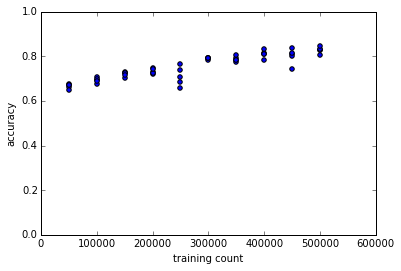

In [41]:
x = df['training_size']
y = df['overall_acc']
plt.scatter(x,y)
plt.xlabel('training count')
plt.ylabel('accuracy')
plt.ylim((0.0,1.0))

In [42]:
acc_mean = df.groupby(['training_size']).apply(np.mean)['overall_acc']
acc_std = df.groupby(['training_size']).apply(np.std)['overall_acc']
print(acc_std)
print(acc_mean)

training_size
50000     0.009920
100000    0.010654
150000    0.009423
200000    0.010007
250000    0.037423
300000    0.003605
350000    0.011068
400000    0.016781
450000    0.032245
500000    0.012902
Name: overall_acc, dtype: float64
training_size
50000     0.66544
100000    0.69374
150000    0.72022
200000    0.73286
250000    0.71084
300000    0.79136
350000    0.78848
400000    0.80994
450000    0.80134
500000    0.82818
Name: overall_acc, dtype: float64


[None, None, None, None, None]

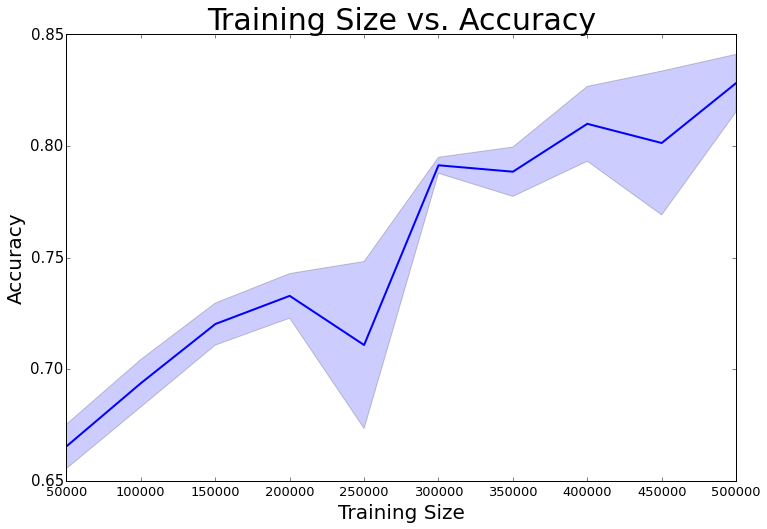

In [50]:
# plot it!
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(list(acc_mean.index), acc_mean, lw=2, color='blue')
ax.fill_between(list(acc_mean.index), acc_mean+acc_std, acc_mean-acc_std, facecolor='blue', alpha=0.2)
ax.set_xlabel('Training Size', fontsize=20)
ax.set_ylabel("Accuracy", fontsize=20)
ax.set_title("Training Size vs. Accuracy", fontsize=30)
plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=15)